In [1]:
import sys
!{sys.executable} -m pip install plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from datetime import datetime
import re
from itertools import combinations
from collections import Counter

In [3]:
df = pd.read_csv('./netflix_titles.csv')

In [4]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [5]:
df['title'].unique()

array(['Norm of the North: King Sized Adventure',
       'Jandino: Whatever it Takes', 'Transformers Prime', ..., 'Maron',
       "A Young Doctor's Notebook and Other Stories", 'Friends'],
      dtype=object)

### General Missing Values

In [6]:
df.fillna('NOT REGISTERED', inplace=True)

## Splitting countries into different rows

In [7]:
lst_col = 'country'
x = df.assign(**{lst_col:df[lst_col].str.split(',')})
x

show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1               NOT REGISTERED   
2               NOT REGISTERED   
3               NOT REGISTERED   
4             Fernando Lebrija   
...                        ...   
6229            NOT REGISTERED   
6230            NOT REGISTERED   
6231            NOT REGISTERED   
6232            NOT REGISTERED   
6233            NOT REGISTERED   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                      Jandino Asporaat   
2     Peter Cullen, Sumalee Montano, Frank Welker, J...   
3     Will Friedle, Darren Criss, Constance Zimmer, ...   
4     Nesta Cooper, Kate Walsh, John Michael Higgins...   
...                                                 ...   
6229  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   
6230  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   
6231                                     NOT REGISTERED   
6232  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...   
6233  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   

                                            country         date_added  \
0     [United States,  India,  South Korea,  China]  September 9, 2019   
1                                  [United Kingdom]  September 9, 2016   
2                                   [United States]  September 8, 2018   
3                                   [United States]  September 8, 2018   
4                                   [United States]  September 8, 2017   
...                                             ...                ...   
6229                                [United States]     NOT REGISTERED   
6230                                [United States]     NOT REGISTERED   
6231                               [NOT REGISTERED]     NOT REGISTERED   
6232                               [United Kingdom]     NOT REGISTERED   
6233                                [United States]     NOT REGISTERED   

      release_year          rating    duration  \
0             2019           TV-PG      90 min   
1             2016           TV-MA      94 min   
2             2013        TV-Y7-FV    1 Season   
3             2016           TV-Y7    1 Season   
4             2017           TV-14      99 min   
...            ...             ...         ...   
6229          2015              NR  13 Seasons   
6230          2016           TV-MA   4 Seasons   
6231          2016  NOT REGISTERED      60 min   
6232          2013           TV-MA   2 Seasons   
6233          2003           TV-14  10 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1                                       Stand-Up Comedy   
2                                              Kids' TV   
3                                              Kids' TV   
4                                              Comedies   
...                                                 ...   
6229  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6230                                        TV Comedies   
623

In [8]:
all_data = pd.DataFrame({col:np.repeat(x[col].values, x[lst_col].str.len())
              for col in x.columns.difference([lst_col])
             }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]

In [9]:
all_data

show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     81145628    Movie      Norm of the North: King Sized Adventure   
2     81145628    Movie      Norm of the North: King Sized Adventure   
3     81145628    Movie      Norm of the North: King Sized Adventure   
4     80117401    Movie                   Jandino: Whatever it Takes   
...        ...      ...                                          ...   
7653  80000063  TV Show                                 Red vs. Blue   
7654  70286564  TV Show                                        Maron   
7655  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
7656  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
7657  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1     Richard Finn, Tim Maltby   
2     Richard Finn, Tim Maltby   
3     Richard Finn, Tim Maltby   
4               NOT REGISTERED   
...                        ...   
7653            NOT REGISTERED   
7654            NOT REGISTERED   
7655            NOT REGISTERED   
7656            NOT REGISTERED   
7657            NOT REGISTERED   

                                                   cast         country  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   United States   
1     Alan Marriott, Andrew Toth, Brian Dobson, Cole...           India   
2     Alan Marriott, Andrew Toth, Brian Dobson, Cole...     South Korea   
3     Alan Marriott, Andrew Toth, Brian Dobson, Cole...           China   
4                                      Jandino Asporaat  United Kingdom   
...                                                 ...             ...   
7653  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
7654  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
7655                                     NOT REGISTERED  NOT REGISTERED   
7656  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
7657  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   

             date_added  release_year          rating    duration  \
0     September 9, 2019          2019           TV-PG      90 min   
1     September 9, 2019          2019           TV-PG      90 min   
2     September 9, 2019          2019           TV-PG      90 min   
3     September 9, 2019          2019           TV-PG      90 min   
4     September 9, 2016          2016           TV-MA      94 min   
...                 ...           ...             ...         ...   
7653     NOT REGISTERED          2015              NR  13 Seasons   
7654     NOT REGISTERED          2016           TV-MA   4 Seasons   
7655     NOT REGISTERED          2016  NOT REGISTERED      60 min   
7656     NOT REGISTERED          2013           TV-MA   2 Seasons   
7657     NOT REGISTERED          2003           TV-14  10 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1                    Children & Family Movies, Comedies   
2                    Children & Family Movies, Comedies   
3                    Children & Family Movies, Comedies   
4                                       Stand-Up Comedy   
...                                                 ...   
7653  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
7654                                        TV Comedies   
7655                                             Movies   
7656           British TV Shows, TV Comedies, TV Dramas   
7657                     Classic & Cult TV, TV Comedies   

                                            description  
0     Before planning an awesome wedding for his gra...  
1     Before planning an awesome wedding for his gra...  
2     Before planning an awesome wedding for his gra...  
3     Before planning an awesome wedding for his gra...  
4   

### More Missing Values

In [10]:
all_data.replace('', 'NOT REGISTERED', inplace= True)

## Turning date_added into datetime

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7658 entries, 0 to 7657
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7658 non-null   int64 
 1   type          7658 non-null   object
 2   title         7658 non-null   object
 3   director      7658 non-null   object
 4   cast          7658 non-null   object
 5   country       7658 non-null   object
 6   date_added    7658 non-null   object
 7   release_year  7658 non-null   int64 
 8   rating        7658 non-null   object
 9   duration      7658 non-null   object
 10  listed_in     7658 non-null   object
 11  description   7658 non-null   object
dtypes: int64(2), object(10)
memory usage: 718.1+ KB


In [12]:
all_data['date_added'] = all_data['date_added'].str.replace(',','')
all_data['date_added'] = all_data['date_added'].str.replace('/',' ')

In [13]:
with_date = all_data[all_data['date_added'] != 'NOT REGISTERED']

In [14]:
date_list = with_date['date_added'].tolist()

In [15]:
date_list = [i.lstrip(' ') for i in date_list]

In [16]:
date_list = [datetime.strptime(x, '%B %d %Y') for x in date_list]

In [17]:
all_data['date_added'] = pd.Series(date_list)

## Country Column Cleaning

In [18]:
country_list = all_data['country'].tolist()

In [19]:
country_list = [i.lstrip(' ') for i in country_list]

In [20]:
all_data['country'] = pd.Series(country_list)

In [21]:
all_data['year_added'] = all_data['date_added'].dt.year

In [22]:
all_data.head()

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  81145628  Movie  Norm of the North: King Sized Adventure   
2  81145628  Movie  Norm of the North: King Sized Adventure   
3  81145628  Movie  Norm of the North: King Sized Adventure   
4  80117401  Movie               Jandino: Whatever it Takes   

                   director  \
0  Richard Finn, Tim Maltby   
1  Richard Finn, Tim Maltby   
2  Richard Finn, Tim Maltby   
3  Richard Finn, Tim Maltby   
4            NOT REGISTERED   

                                                cast         country  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   United States   
1  Alan Marriott, Andrew Toth, Brian Dobson, Cole...           India   
2  Alan Marriott, Andrew Toth, Brian Dobson, Cole...     South Korea   
3  Alan Marriott, Andrew Toth, Brian Dobson, Cole...           China   
4                                   Jandino Asporaat  United Kingdom   

  date_added  release_year rating duration  \
0 2019-09-09          2019  TV-PG   90 min   
1 2019-09-09          2019  TV-PG   90 min   
2 2019-09-09          2019  TV-PG   90 min   
3 2019-09-09          2019  TV-PG   90 min   
4 2016-09-09          2016  TV-MA   94 min   

                            listed_in  \
0  Children & Family Movies, Comedies   
1  Children & Family Movies, Comedies   
2  Children & Family Movies, Comedies   
3  Children & Family Movies, Comedies   
4                     Stand-Up Comedy   

                                         description  year_added  
0  Before planning an awesome wedding for his gra...      2019.0  
1  Before planning an awesome wedding for his gra...      2019.0  
2  Before planning an awesome wedding for his gra...      2019.0  
3  Before planning an awesome wedding for his gra...      2019.0  
4  Jandino Asporaat riffs on the challenges of ra...      2016.0

## Rating Column

In [23]:
pd.set_option('display.max_rows', 15)

In [24]:
all_data['rating'].value_counts()

TV-MA             2387
TV-14             1904
TV-PG              813
R                  778
PG-13              453
PG                 278
NR                 275
TV-Y7              210
TV-Y               186
TV-G               165
TV-Y7-FV           135
G                   50
UR                  10
NOT REGISTERED      10
NC-17                4
Name: rating, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

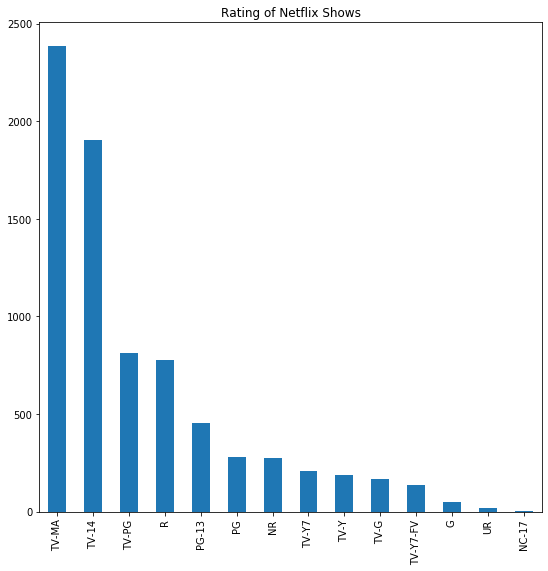

In [111]:
all_data['rating'] = all_data['rating'].str.replace('NOT REGISTERED', 'UR')
all_data['rating'].value_counts().plot(kind='bar')
plt.title('Rating of Netflix Shows')
plt.show

## Network Cast-Director Exploration

#### Pairs of cast that work mostly together

In [26]:
count = Counter()

for row in df['cast']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) #change the '2' if you want to find 3 or more casts at the same time

for key,value in count.most_common(10):
    print(key, value)

(' Eric Idle', ' Michael Palin') 13
(' Terry Jones', ' Michael Palin') 13
(' Eric Idle', ' Terry Jones') 12
(' Andrea Libman', ' Ian James Corlett') 11
(' Terry Gilliam', ' Terry Jones') 10
('Michela Luci', ' Jamie Watson') 9
('Michela Luci', ' Eric Peterson') 9
(' Jamie Watson', ' Eric Peterson') 9
(' Vincent Tong', ' Alessandro Juliani') 9
(' Andrea Libman', ' Alessandro Juliani') 9


#### Pairs of directors that work mostly together

In [27]:
count = Counter()

for row in df['director']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) #change the '2' if you want to find 3 or more directors at the same time

for key,value in count.most_common(10):
    print(key, value)

('Raúl Campos', ' Jan Suter') 18
(' John Paul Tremblay', ' Robb Wells') 5
('Abbas Alibhai Burmawalla', ' Mastan Alibhai Burmawalla') 4
('Lilly Wachowski', ' Lana Wachowski') 4
('Munjal Shroff', ' Tilak Shetty') 3
('Latif Faiziyev', ' Umesh Mehra') 3
('Sumitra Bhave', ' Sunil Sukthankar') 3
('Mike Smith', ' John Paul Tremblay') 3
('Mike Smith', ' Robb Wells') 3
('Kobun Shizuno', ' Hiroyuki Seshita') 3


## Content Over the Years

### What type of content is Netflix focusing on in recent years?

In [28]:
col = 'year_added'

d1 = all_data[all_data['type'] == 'TV Show']
d2 = all_data[all_data['type'] == 'Movie']

vc1 = d1['year_added'].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : 'count', 'index' : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : 'count', 'index' : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1['count'], name='TV Shows', marker=dict())
trace2 = go.Scatter(x=vc2[col], y=vc2['count'], name='Movies', marker=dict())
data = [trace1, trace2]
layout = go.Layout(title='Content added over the years', legend=dict(x=0.1, y=1.1, orientation='h'))
fig = go.Figure(data, layout=layout)
fig.show()

In 2019, the number of movies added is more than doubled the number of tv-shows added. This shows that Netflix is focusing on uploading more movies in recent years.

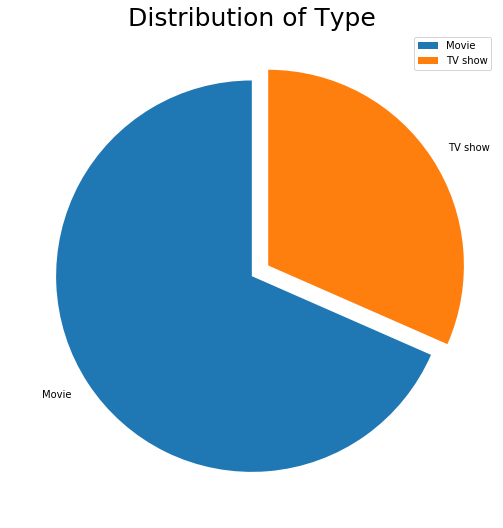

In [29]:
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, explode = explode, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

1/3 of the content in Netflix are TV-Shows and the rest are movies.

## Categories (listed_in) Column, Splitting categories into their own rows

In [30]:
spl_cat = 'listed_in'
z = df.assign(**{spl_cat:df[spl_cat].str.split(',')})

In [31]:
category_spl = pd.DataFrame({col:np.repeat(z[col].values, z[spl_cat].str.len())
              for col in z.columns.difference([spl_cat])
             }).assign(**{spl_cat:np.concatenate(z[spl_cat].values)})[z.columns.tolist()]

In [32]:
category_spl['count'] = 1

In [33]:
category_spl.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  81145628    Movie  Norm of the North: King Sized Adventure   
2  80117401    Movie               Jandino: Whatever it Takes   
3  70234439  TV Show                       Transformers Prime   
4  80058654  TV Show         Transformers: Robots in Disguise   

                   director  \
0  Richard Finn, Tim Maltby   
1  Richard Finn, Tim Maltby   
2            NOT REGISTERED   
3            NOT REGISTERED   
4            NOT REGISTERED   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
2                                   Jandino Asporaat   
3  Peter Cullen, Sumalee Montano, Frank Welker, J...   
4  Will Friedle, Darren Criss, Constance Zimmer, ...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1  United States, India, South Korea, China  September 9, 2019          2019   
2                            United Kingdom  September 9, 2016          2016   
3                             United States  September 8, 2018          2013   
4                             United States  September 8, 2018          2016   

     rating  duration                 listed_in  \
0     TV-PG    90 min  Children & Family Movies   
1     TV-PG    90 min                  Comedies   
2     TV-MA    94 min           Stand-Up Comedy   
3  TV-Y7-FV  1 Season                  Kids' TV   
4     TV-Y7  1 Season                  Kids' TV   

                                         description  count  
0  Before planning an awesome wedding for his gra...      1  
1  Before planning an awesome wedding for his gra...      1  
2  Jandino Asporaat riffs on the challenges of ra...      1  
3  With the help of three human allies, the Autob...      1  
4  When a prison ship crash unleashes hundreds of...      1

### What type of Genre does Netflix have the most?

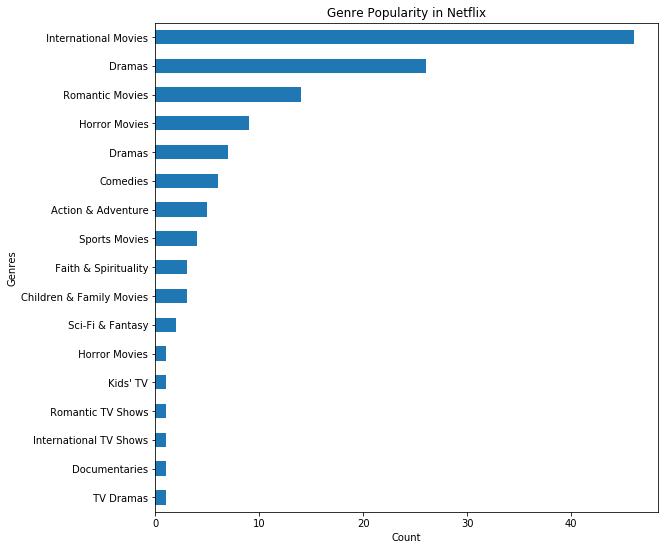

In [129]:
pd.set_option('display.max_rows', None)
category_spl.groupby(['listed_in']).sum()['count'].sort_values(ascending=True).plot.barh()
plt.title('Genre Popularity in Netflix')
plt.ylabel('Genres')
plt.xlabel('Count')
plt.show()

In [36]:
data_new = pd.read_csv('./data_new.csv')

In [37]:
data_new.head()

Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

### Drop unnecessary columns and cleaning '%' from Rotten Tomatoes column

In [38]:
data_new.dropna(subset = ['Rotten Tomatoes'], inplace=True)

In [39]:
data_new.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)

In [40]:
data_new['Rotten Tomatoes'] = data_new['Rotten Tomatoes'].str.replace('%', '').astype(float)

In [41]:
data_new.head()

Title  Year  Age  IMDb  Rotten Tomatoes  Netflix  \
0                       Inception  2010  13+   8.8             87.0        1   
1                      The Matrix  1999  18+   8.7             87.0        1   
2          Avengers: Infinity War  2018  13+   8.5             84.0        1   
3              Back to the Future  1985   7+   8.5             96.0        1   
4  The Good, the Bad and the Ugly  1966  18+   8.8             97.0        1   

   Hulu  Prime Video  Disney+  Type                       Directors  \
0     0            0        0     0               Christopher Nolan   
1     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2     0            0        0     0         Anthony Russo,Joe Russo   
3     0            0        0     0                 Robert Zemeckis   
4     0            1        0     0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  
0  English,Japanese,French    148.0  
1                  English    136.0  
2                  English    149.0  
3                  English    116.0  
4                  Italian    161.0

### Split Genres, Country, Language into Lists and Plotting Average Rating for each Genre

In [42]:
df1 = data_new[data_new['Genres'].notna()]

In [43]:
spl_genre = 'Genres'
y = df1.assign(**{spl_genre:df1[spl_genre].str.split(',')})

In [44]:
genre_spl = pd.DataFrame({col:np.repeat(y[col].values, y[spl_genre].str.len())
              for col in y.columns.difference([spl_genre])
             }).assign(**{spl_genre:np.concatenate(y[spl_genre].values)})[y.columns.tolist()]

In [45]:
genre_spl.head()

Title  Year  Age  IMDb  Rotten Tomatoes  Netflix  Hulu  Prime Video  \
0   Inception  2010  13+   8.8             87.0        1     0            0   
1   Inception  2010  13+   8.8             87.0        1     0            0   
2   Inception  2010  13+   8.8             87.0        1     0            0   
3   Inception  2010  13+   8.8             87.0        1     0            0   
4  The Matrix  1999  18+   8.7             87.0        1     0            0   

   Disney+  Type                       Directors     Genres  \
0        0     0               Christopher Nolan     Action   
1        0     0               Christopher Nolan  Adventure   
2        0     0               Christopher Nolan     Sci-Fi   
3        0     0               Christopher Nolan   Thriller   
4        0     0  Lana Wachowski,Lilly Wachowski     Action   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1  United States,United Kingdom  English,Japanese,French    148.0  
2  United States,United Kingdom  English,Japanese,French    148.0  
3  United States,United Kingdom  English,Japanese,French    148.0  
4                 United States                  English    136.0

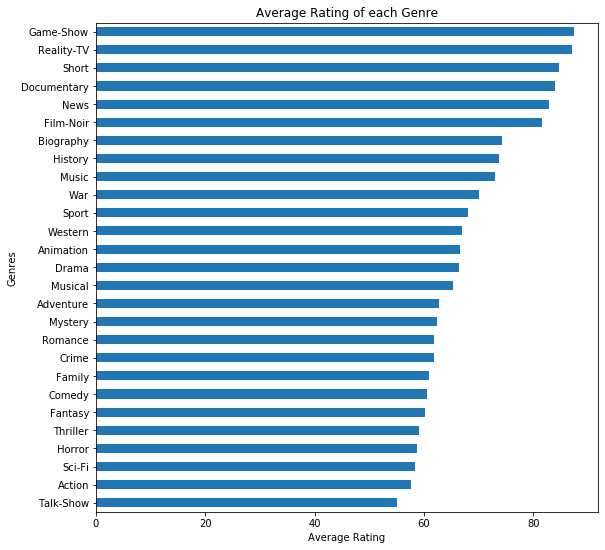

In [128]:
genre_spl.groupby(['Genres']).mean()['Rotten Tomatoes'].sort_values(ascending=True).plot.barh()
plt.ylabel('Genres')
plt.xlabel('Average Rating')
plt.title('Average Rating of each Genre')
plt.show()

Shows with 'Game-Show' genre have the highest average rating, followed by 'Reality-TV' shows and 'Short' films in the 3rd place.

### Shows those aren't on Netflix

In [48]:
no_netflix = data_new.loc[data_new['Netflix'] == 0]

In [49]:
no_netflix.shape

(3731, 15)

There are total of 3731 shows that are not available on Netflix.

### Year released >= 2016 + Good IMDb &  RT Rating

In [50]:
df2 = no_netflix.loc[no_netflix['Year'] >= 2016]

In [51]:
df2 = df2.loc[df2['Rotten Tomatoes'] >= 75]

In [112]:
df2 = df2.loc[df2['IMDb'] >= 8]
df2

Title  Year  Age  IMDb  \
3562                                   Parasite  2019  18+   8.6   
4591                                   Mahanati  2018   7+   8.5   
4511                                   For Sama  2019   7+   8.5   
16221                                      Coco  2017   7+   8.4   
16216                         Avengers: Endgame  2019  13+   8.4   
4651                                    Gleason  2016  18+   8.4   
4987                        Wait for Your Laugh  2017  NaN   8.3   
4497                                    Tumbbad  2018  NaN   8.3   
3890   Larger than Life: The Kevyn Aucoin Story  2017  NaN   8.3   
3742                  Andy Irons: Kissed by God  2018  NaN   8.3   
3577                 Portrait of a Lady on Fire  2019  18+   8.2   
3590                                  Apollo 11  2019  all   8.2   
3580                                  Free Solo  2018  13+   8.2   
4077                       Who Let the Dogs Out  2019  13+   8.2   
4444                             The Handmaiden  2016  NaN   8.1   
4896                           Cries from Syria  2017  18+   8.1   
3625                            Minding the Gap  2019  18+   8.1   
16262                                      Togo  2019   7+   8.1   
3637                    The Biggest Little Farm  2019   7+   8.1   
3584                                Shoplifters  2018  18+   8.0   
16225                                  Zootopia  2016   7+   8.0   
3613                                  Honeyland  2019  NaN   8.0   

       Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
3562              99.0        0     1            1        0     0   
4591             100.0        0     0            1        0     0   
4511              99.0        0     0            1        0     0   
16221             97.0        0     0            0        1     0   
16216             93.0        0     0            0        1     0   
4651              96.0        0     0            1        0     0   
4987              89.0        0     0            1        0     0   
4497              89.0        0     0            1        0     0   
3890              90.0        0     1            0        0     0   
3742             100.0        0     1            1        0     0   
3577              98.0        0     1            0        0     0   
3590              99.0        0     1            0        0     0   
3580              97.0        0     1            0        1     0   
4077             100.0        0     1            0        0     0   
4444              95.0        0     0            1        0     0   
4896             100.0        0     0            1        0     0   
3625             100.0        0     1            0        0     0   
16262             91.0        0     0            0        1     0   
3637              91.0        0     1            0        0     0   
3584              99.0        0     1            0        0     0   
16225             98.0        0     0            0        1     0   
3613             100.0        0     1            0        0     0   

                                       Directors  \
3562                                Bong Joon Ho   
4591                                  Nag Ashwin   
4511                 Waad Al-Kateab,Edward Watts   
16221                  Lee Unkrich,Adrian Molina   
16216                    Anthony Russo,Joe Russo   
4651                                  Clay Tweel   
4987                                  Jason Wise   
4497   Rahi Anil Barve,Anand Gandhi,Adesh Prasad   
3890                              Tiffany Bartok   
3742                      Steve Jones,Todd Jones   
3577                              Céline Sciamma   
3590                         Todd Douglas Miller   
3580        Jimmy Chin,Elizabeth Chai Vasarhelyi   
4077                                 Brent Hodge   
4444                              Chan-wook Park   
4896                           Evgeny Afineevsky   
3625 

In [113]:
df2.shape

(22, 15)

22 shows that are not available on Netflix but have rating 'Rotten Tomatoes' above 75 and IMDb above 8.

In [115]:
df2['Runtime'].unique()

array([132., 177., 100., 105., 181., 110.,  85., 104., 102., 122.,  93.,
        70., 145., 111., 113.,  91., 121., 108.,  89.])

Based on the Runtime of the shows, we could conclude that these shows are movies. These are very appropriate for Netflix as Netflix are focusing more and more on Movies in these recent years. The popularity of movies can help to boost Netflix's viewers especially with these new shows.

## Indonesia

#### Netflix

In [56]:
all_data.head()

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  81145628  Movie  Norm of the North: King Sized Adventure   
2  81145628  Movie  Norm of the North: King Sized Adventure   
3  81145628  Movie  Norm of the North: King Sized Adventure   
4  80117401  Movie               Jandino: Whatever it Takes   

                   director  \
0  Richard Finn, Tim Maltby   
1  Richard Finn, Tim Maltby   
2  Richard Finn, Tim Maltby   
3  Richard Finn, Tim Maltby   
4            NOT REGISTERED   

                                                cast         country  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   United States   
1  Alan Marriott, Andrew Toth, Brian Dobson, Cole...           India   
2  Alan Marriott, Andrew Toth, Brian Dobson, Cole...     South Korea   
3  Alan Marriott, Andrew Toth, Brian Dobson, Cole...           China   
4                                   Jandino Asporaat  United Kingdom   

  date_added  release_year rating duration  \
0 2019-09-09          2019  TV-PG   90 min   
1 2019-09-09          2019  TV-PG   90 min   
2 2019-09-09          2019  TV-PG   90 min   
3 2019-09-09          2019  TV-PG   90 min   
4 2016-09-09          2016  TV-MA   94 min   

                            listed_in  \
0  Children & Family Movies, Comedies   
1  Children & Family Movies, Comedies   
2  Children & Family Movies, Comedies   
3  Children & Family Movies, Comedies   
4                     Stand-Up Comedy   

                                         description  year_added  
0  Before planning an awesome wedding for his gra...      2019.0  
1  Before planning an awesome wedding for his gra...      2019.0  
2  Before planning an awesome wedding for his gra...      2019.0  
3  Before planning an awesome wedding for his gra...      2019.0  
4  Jandino Asporaat riffs on the challenges of ra...      2016.0

In [61]:
indo = all_data.loc[all_data['country'] == 'Indonesia']

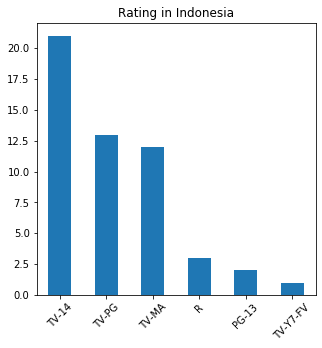

In [105]:
indo['rating'].value_counts().plot.bar(figsize=(5,5))
plt.xticks(rotation = 45)
plt.title('Rating in Indonesia')
plt.show()

In [90]:
spl_cat = 'listed_in'
z = indo.assign(**{spl_cat:indo[spl_cat].str.split(',')})

In [91]:
category_spl = pd.DataFrame({col:np.repeat(z[col].values, z[spl_cat].str.len())
              for col in z.columns.difference([spl_cat])
             }).assign(**{spl_cat:np.concatenate(z[spl_cat].values)})[z.columns.tolist()]

In [92]:
category_spl['count'] = 1

In [93]:
category_spl.head()

show_id   type   title         director  \
0  81002850  Movie     5CM  Rizal Mantovani   
1  81002850  Movie     5CM  Rizal Mantovani   
2  81002864  Movie  Single     Raditya Dika   
3  81002864  Movie  Single     Raditya Dika   
4  81002864  Movie  Single     Raditya Dika   

                                                cast    country date_added  \
0  Herjunot Ali, Raline Shah, Fedi Nuril, Pevita ...  Indonesia 2018-09-28   
1  Herjunot Ali, Raline Shah, Fedi Nuril, Pevita ...  Indonesia 2018-09-28   
2  Raditya Dika, Annisa Rawles, Chandra Liow, Pan...  Indonesia 2018-09-28   
3  Raditya Dika, Annisa Rawles, Chandra Liow, Pan...  Indonesia 2018-09-28   
4  Raditya Dika, Annisa Rawles, Chandra Liow, Pan...  Indonesia 2018-09-28   

   release_year rating duration              listed_in  \
0          2012  TV-14  126 min                 Dramas   
1          2012  TV-14  126 min   International Movies   
2          2015  TV-PG  127 min               Comedies   
3          2015  TV-PG  127 min   International Movies   
4          2015  TV-PG  127 min        Romantic Movies   

                                         description  year_added  count  
0  Five friends embark on a mission to climb the ...      2018.0      1  
1  Five friends embark on a mission to climb the ...      2018.0      1  
2  Unemployed and immature, a somewhat pathetic b...      2018.0      1  
3  Unemployed and immature, a somewhat pathetic b...      2018.0      1  
4  Unemployed and immature, a somewhat pathetic b...      2018.0      1

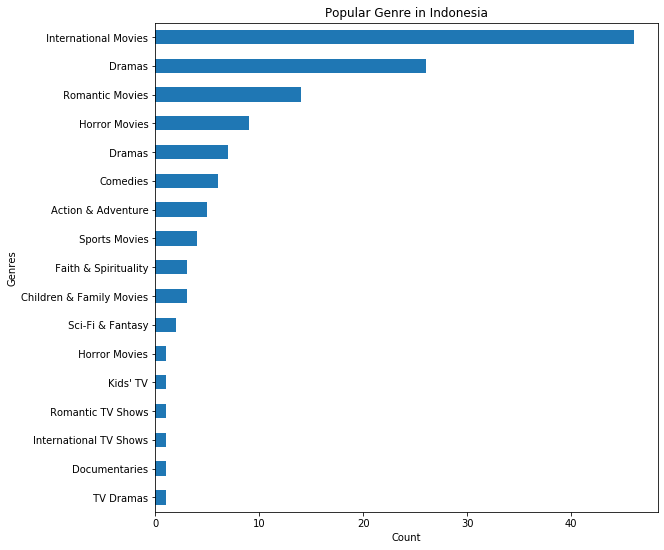

In [132]:
category_spl.groupby(['listed_in']).sum()['count'].sort_values().plot.barh()
plt.title('Popular Genre in Indonesia')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

<BarContainer object of 22 artists>

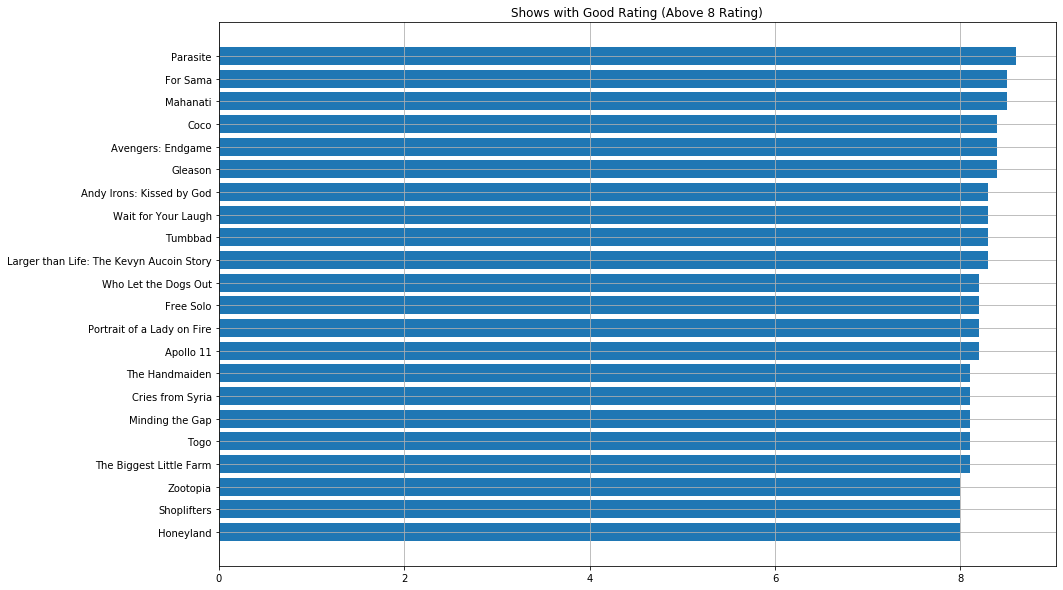

In [134]:
df2=df2.sort_values(by="IMDb",ascending=True)
plt.figure(figsize=(15,10))
plt.title('Shows with Good Rating (Above 8 Rating)')
plt.grid()
plt.barh(df2["Title"],df2["IMDb"])